### Goals 

This notebook contains an analysis on mental health data. The goal for this project was to do the following:

- Get familiar with the data
- Clean the data 
- Develop some questions for analysis
- Analyze variables within the data to gain patterns and insights on these questions

### Data 

The data for this project was downloaded from Kaggle:
https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder

This notebook is created as a final portfolio project at Codecademy's course Data Scientist: Analytics. 

This dataset contains informative data from countries across the globe about the prevalence of mental health disorders including schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression and alcohol use disorders. This data helps to gain an insight into how these issues are impacting lives; allowing for a deeper understanding of these conditions and the implications. 

Since I'm from Estonia I would like to focus on my home country and concentrate on these questions: 

1. Trend analysis in Estonia vs. global averages

2. Percentage change over time
   
3. Focus on specific disorders and the impact of Socioeconomic Events in Estonia


#### Loading the Data 

First, the necessary libraries are loaded into the notebook. 
The pandas library is used to import data from mental_health_data.csv and preview the first five rows of the DataFrame.

In [2]:
# Import all the necessary tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings

In [17]:
# Load the data and display all columns
mh_data = pd.read_csv("mental_health_data.csv", low_memory=False)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Preview the first few rows of the dataset
mh_data.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
mh_data.columns

Index(['index', 'Entity', 'Code', 'Year', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')

In [5]:
mh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


In [6]:
# see what columns have missing data
mh_data.isnull().sum()

index                             0
Entity                            0
Code                           5412
Year                              0
Schizophrenia (%)             82678
Bipolar disorder (%)          89147
Eating disorders (%)           8317
Anxiety disorders (%)        102085
Drug use disorders (%)       102085
Depression (%)               102085
Alcohol use disorders (%)    102085
dtype: int64

In [12]:
print(mh_data.describe())

               index  Anxiety disorders (%)  Drug use disorders (%)  \
count  108553.000000            6468.000000             6468.000000   
mean    54276.000000               3.989921                0.862278   
std     31336.696223               1.167526                0.460679   
min         0.000000               2.023393                0.383650   
25%     27138.000000               3.188824                0.535064   
50%     54276.000000               3.554373                0.726430   
75%     81414.000000               4.682163                0.940157   
max    108552.000000               8.967330                3.452476   

       Depression (%)  Alcohol use disorders (%)  
count     6468.000000                6468.000000  
mean         3.497654                   1.585821  
std          0.655859                   0.860283  
min          2.139903                   0.446940  
25%          3.005529                   0.993685  
50%          3.499606                   1.479936  
75%

#### Data Information 

The dataset contains 11 columns and 108,553 rows. However, it includes a large amount of data, with some columns arranged in an unusual manner and a significant amount of missing information.

As a next step, I will filter the data to focus on the most relevant rows. I will remove all rows corresponding to years before 1990, as well as those lacking a country code or representing a region rather than a specific country. To streamline the analysis, I will retain only the rows that provide information on Estonia and global data. Additionally, I will remove the country code column.


In [7]:
# Step 1: Filter for 'Estonia' and 'World' in the 'Entity' column
mh_filtered = mh_data[mh_data['Entity'].isin(['Estonia', 'World'])]

# Step 2: Filter out non-numeric year values
mh_filtered = mh_filtered[mh_filtered['Year'].str.isnumeric()]

# Step 3: Convert the Year column to integers
mh_filtered['Year'] = mh_filtered['Year'].astype(int)

# Step 4: Filter the rows for years 1990 to 2017
mh_filtered = mh_filtered[mh_filtered['Year'].between(1990, 2017)]

# Step 5: Select only relevant columns (Entity, Year, and mental health columns)
columns_to_keep = ['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 
                   'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']

mh_filtered = mh_filtered[columns_to_keep]

# Step 6: Remove rows with missing information in any of the mental health columns
mh_filtered = mh_filtered.dropna()

# Save the filtered DataFrame to a new CSV file
mh_filtered.to_csv('filtered_mental_health_data.csv', index=False)

# Display the new filtered DataFrame
display(mh_filtered)


,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1932,Estonia,1990,0.196205,0.701354,0.217591,2.945480,0.862004,4.532058,4.561719
1933,Estonia,1991,0.19603,0.701387,0.216099,2.946770,0.865199,4.532675,4.650197
1934,Estonia,1992,0.195892,0.701517,0.214754,2.948362,0.869999,4.531758,4.732294
1935,Estonia,1993,0.195813,0.701775,0.214296,2.950295,0.875995,4.531379,4.804268
1936,Estonia,1994,0.195781,0.702039,0.213722,2.951979,0.882167,4.531020,4.863354
1937,Estonia,1995,0.195808,0.702325,0.213587,2.953286,0.890163,4.530258,4.906952
1938,Estonia,1996,0.195875,0.702607,0.214233,2.953530,0.900975,4.529189,4.944610
1939,Estonia,1997,0.19597,0.7029,0.215408,2.952615,0.916553,4.522665,4.984037
1940,Estonia,1998,0.196093,0.703194,0.215566,2.951141,0.935393,4.513299,5.019664
1941,Estonia,1999,0.196243,0.703463,0.216796,2.949644,0.955367,4.500387,5.047094


#### Data types

To simplify further steps, I will make sure all columns have data types that make the most sense. 

In [10]:
# Convert the 'Entity' column to category
mh_filtered['Entity'] = mh_filtered['Entity'].astype('category')

# Convert 'Year' column to integer
mh_filtered['Year'] = mh_filtered['Year'].astype(int)

# Convert the mental health percentage columns to float
mental_health_columns = [
    'Schizophrenia (%)', 
    'Bipolar disorder (%)', 
    'Eating disorders (%)',
    'Anxiety disorders (%)',
    'Drug use disorders (%)',
    'Depression (%)',
    'Alcohol use disorders (%)'
]

for col in mental_health_columns:
    mh_filtered[col] = pd.to_numeric(mh_filtered[col], errors='coerce')


print(mh_filtered.dtypes)

Entity                       category
Year                            int64
Schizophrenia (%)             float64
Bipolar disorder (%)          float64
Eating disorders (%)          float64
Anxiety disorders (%)         float64
Drug use disorders (%)        float64
Depression (%)                float64
Alcohol use disorders (%)     float64
dtype: object


### The Analysis 
After some data cleaning and tidying, the DataFrame is ready for analysis.
The hope is that through summary statistics and visualizations the following question can be answered:

1. Trend Analysis in Estonia vs. Global Averages:
How do the trends of mental health disorders in Estonia compare to the global averages?

2. Percentage Change Over Time:
How have the disorders changed in time and compare to the changes globally? 

3. Focus on Specific Disorders and the impact of Socioeconomic Events in Estonia:
How have the main events between 1990 and 2017 impacted the prevalence of depression and drug use disorders in Estonia?

#### 1. Trend Analysis in Estonia vs. Global Averages

This analysis will compare the prevalence trends of mental health disorders in Estonia to the global averages. 

Here are time series graphs for each mental health disorder showing Estonia’s trendline alongside the global average. This will help identify whether Estonia's trends align with, exceed, or fall below global patterns.

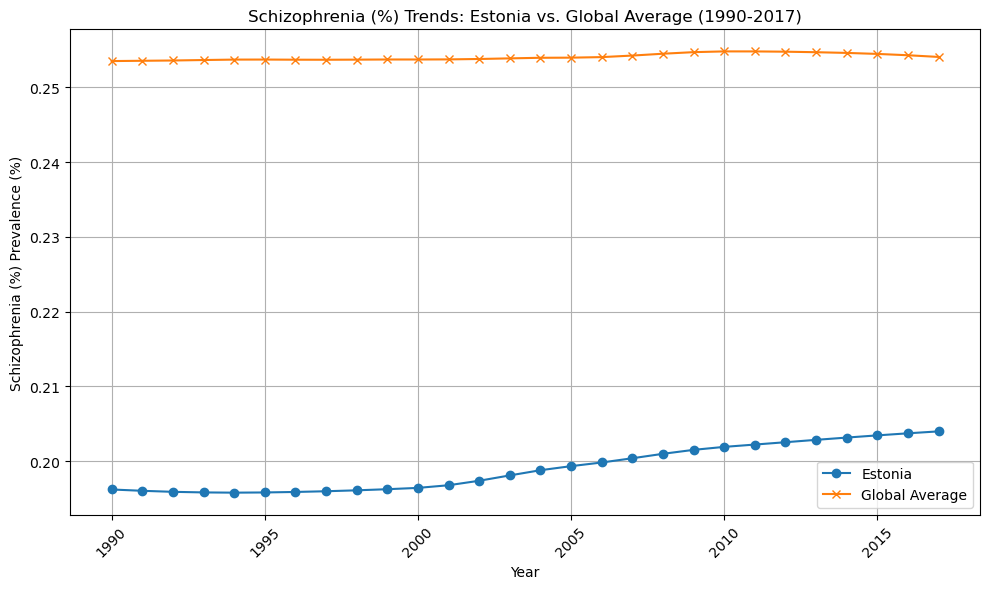

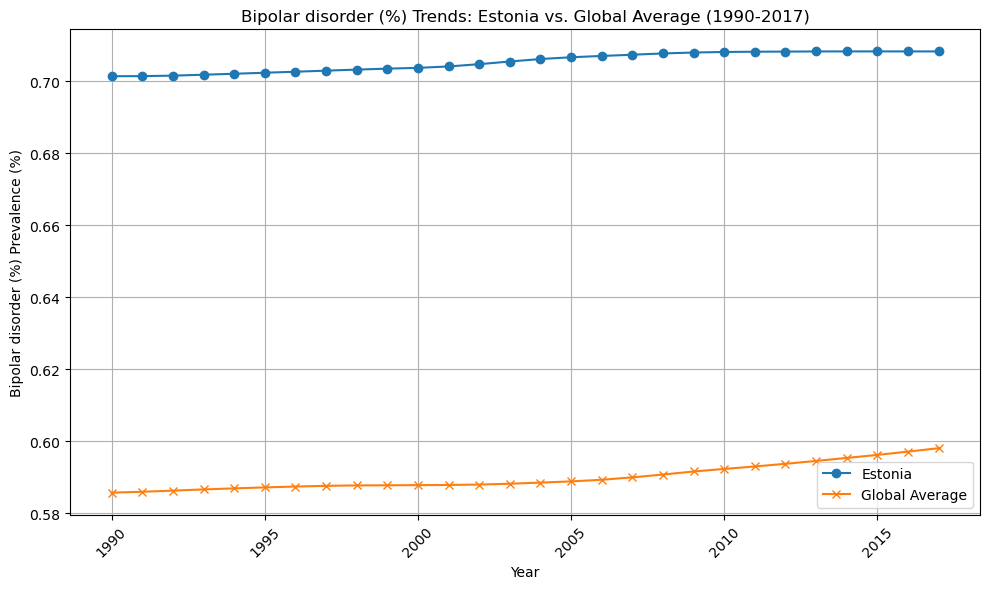

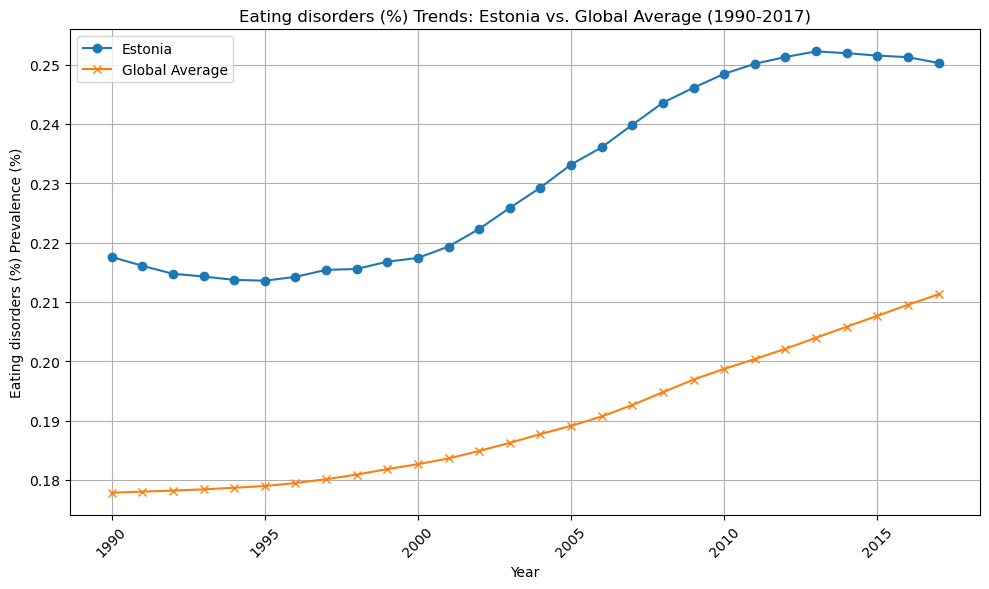

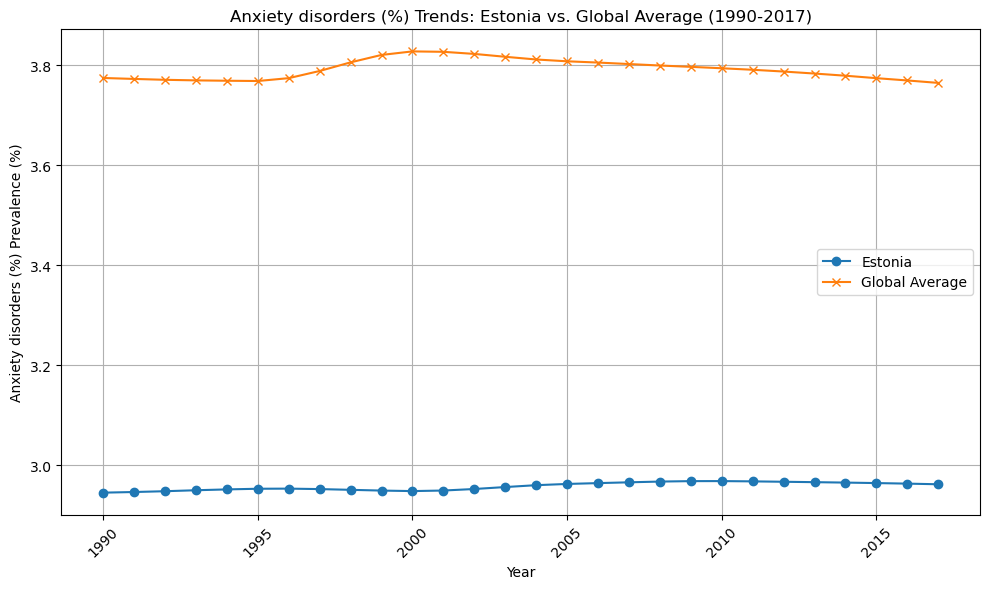

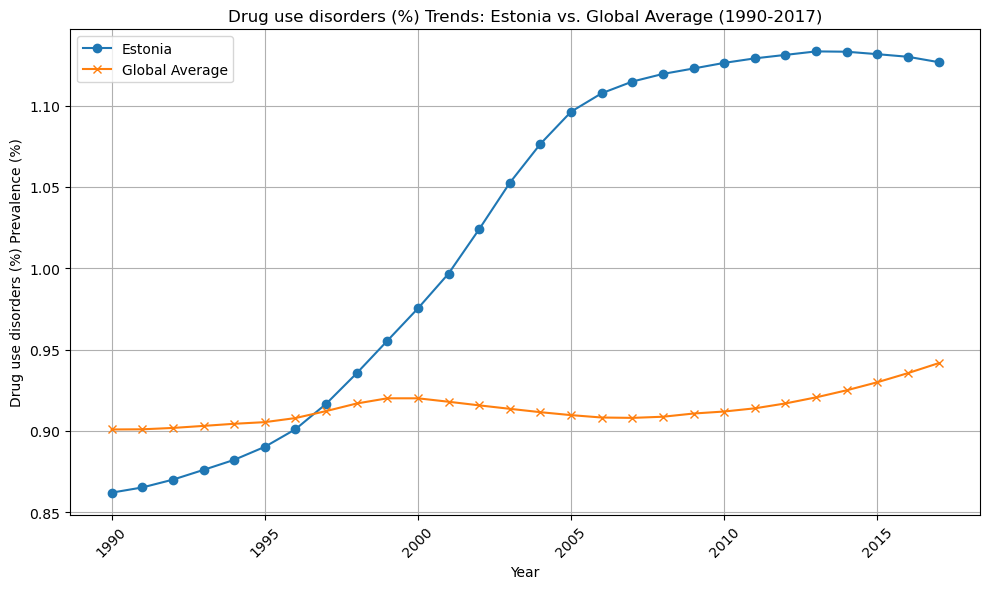

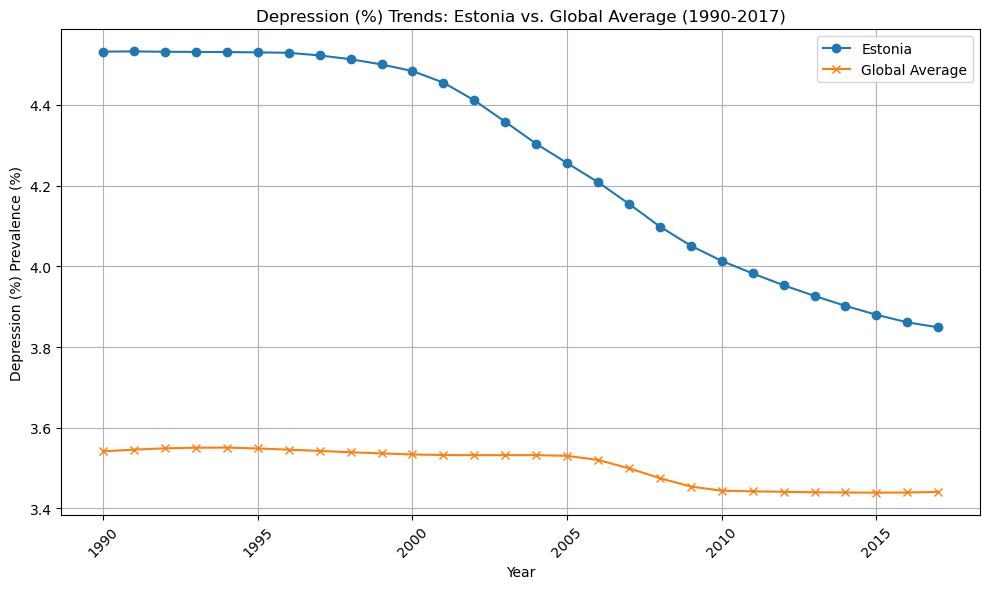

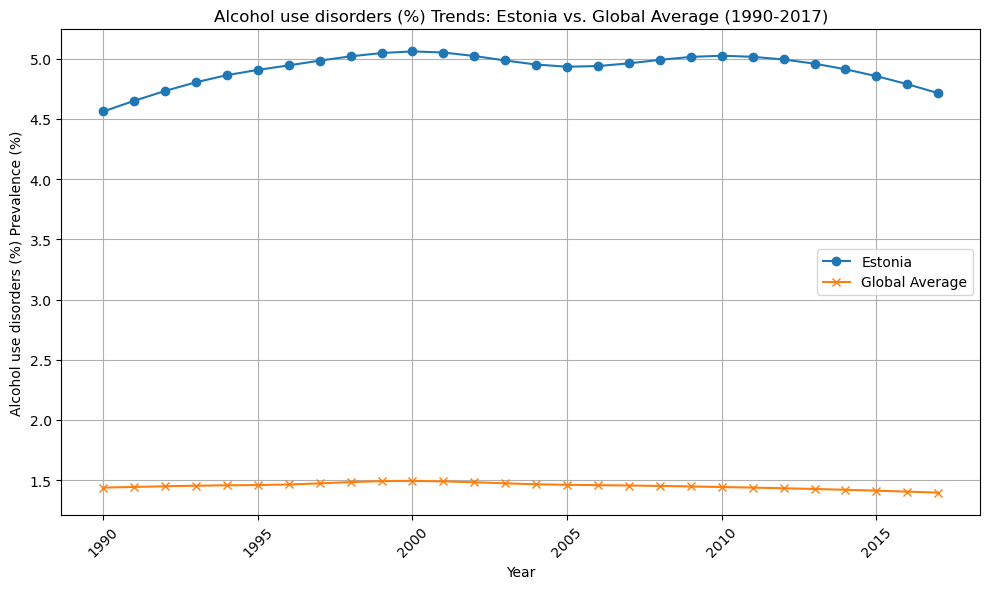

In [18]:
# Filter out global averages and group by 'Year'
global_averages = mh_filtered[mh_filtered['Entity'] == 'World'].groupby('Year')[mental_health_columns].mean()

# Filter data for Estonia
estonia_data = mh_filtered[mh_filtered['Entity'] == 'Estonia']

# Plotting each mental health disorder trend
for disorder in mental_health_columns:
    plt.figure(figsize=(10, 6))
    
    # Plot Estonia data
    plt.plot(estonia_data['Year'], estonia_data[disorder], label='Estonia', marker='o')
    
    # Plot Global Average data
    plt.plot(global_averages.index, global_averages[disorder], label='Global Average', marker='x')
    
    plt.title(f'{disorder} Trends: Estonia vs. Global Average (1990-2017)')
    plt.xlabel('Year')
    plt.ylabel(f'{disorder} Prevalence (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.tight_layout()       
    plt.show()

##### Summary 
Estonia has higher values than the global average for these disorders: 
- Bipolar disorder
- Eating disorders
- Drug use disorders
- Depression
- Alcohol use disorders

Estonia has lower values than the global average for these disorders: 
- Schizophrenia
- Anxiety Disorders

#### 2. Percentage Change Over Time
This analysis aims to measure and compare the percentage change in the prevalence of various mental health disorders in Estonia from 1990 to 2017, relative to the global changes over the same period.
I will calculate the percentage change in the prevalence rates for each mental health disorder in Estonia and the global averages between 1990 and 2017. This will allow us to understand how the prevalence of these disorders has evolved over time within Estonia compared to the global trend. The results will be visualized using bar charts to clearly depict the changes and facilitate comparisons.

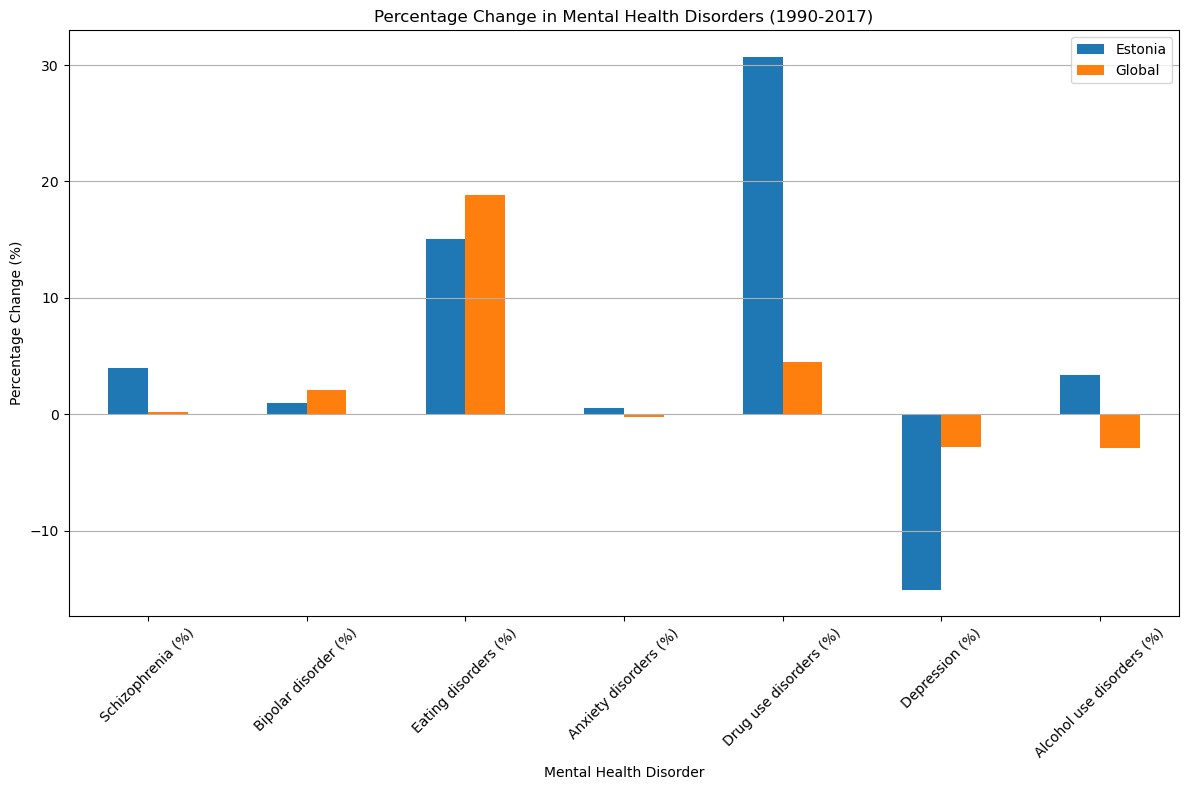

In [13]:
# Filter out global averages and group by 'Year'
global_averages = mh_filtered[mh_filtered['Entity'] == 'World'].groupby('Year')[mental_health_columns].mean()

# Filter data for Estonia
estonia_data = mh_filtered[mh_filtered['Entity'] == 'Estonia']

# Calculate percentage change from 1990 to 2017
def calculate_percentage_change(df, column_name):
    return (df[column_name].iloc[-1] - df[column_name].iloc[0]) / df[column_name].iloc[0] * 100

# Calculate percentage change for Estonia and Global
percentage_changes_estonia = {disorder: calculate_percentage_change(estonia_data, disorder) for disorder in mental_health_columns}
percentage_changes_global = {disorder: calculate_percentage_change(global_averages, disorder) for disorder in mental_health_columns}

# Create a DataFrame to hold the results
percentage_change_df = pd.DataFrame({
    'Estonia': percentage_changes_estonia,
    'Global': percentage_changes_global
})

# Plot the percentage changes
percentage_change_df.plot(kind='bar', figsize=(12, 8))
plt.title('Percentage Change in Mental Health Disorders (1990-2017)')
plt.xlabel('Mental Health Disorder')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

#### Summary
In 27 years, Depression has been the only mental health disorder in this dataset that has decreased in prevalence both in Estonia and globally. Alcohol use disorders have been increasing in Estonia but decreasing globally. Anxiety disorders have almost stayed at the same level. Bipolar disorder has had a small increase. Eating disorders have increased about 15% in Estonia and 19% globally. Schizophrenia has increased 4% in Estonia but stayed at the same level globally. The biggest surprise is that drug use disorders have increased globally about 5% but more than 30% in Estonia!  

#### 3. Focus on Depression and Drug use disorders

I would like to further investigate two trends: 

What has contributed to the significant decrease of depression in Estonia? 
Why have drug use disorders grown in prevalence at rapid pace while globally the trend has been steady?

There have been a lot of change in Estonia over the years 1990 - 2017, but mostly during the 90s. 

Estonia restored its independence from the Soviet Union in 1991, leading to significant political and economic changes. The transition from Soviet rule to a market economy could have impacted mental health due to uncertainty and adjustment challenges. Throughout the 1990s, Estonia implemented major economic reforms, including privatization of state-owned enterprises. These reforms might have led to economic instability and increased stress levels, potentially affecting mental health. Estonia became a member of the EU in 2004. EU membership could have influenced mental health through improved economic opportunities, better access to mental health services, and increased stability. The global financial crisis had a significant impact on Estonia's economy, leading to a recession. The economic downturn might have affected mental health through increased unemployment, financial stress, and reduced access to healthcare services. After the financial crisis, Estonia experienced economic recovery and growth. Improved economic conditions might have had a positive impact on mental health, reducing stress and improving overall well-being. Throughout these years, Estonia made several changes and improvements in its healthcare system, including mental health services. These changes could influence mental health trends by improving access to care and support.


##### Post-Independence Improvement and Decrease in Depression Rates:

After Estonia regained its independence from the Soviet Union in 1991, the country embarked on a transformative journey toward a market economy and democratic governance. This transition brought significant improvements in living standards, economic stability, and access to healthcare. By the mid-1990s and into the 2000s, Estonia experienced considerable economic growth, higher wages, and increased investment in public services. These improvements contributed to a reduction in the prevalence of depression. Enhanced economic opportunities, better social support systems, and improved healthcare infrastructure likely played crucial roles in mitigating the mental health challenges faced by Estonians. As the country adapted to a more prosperous environment, the stress and uncertainty of the post-Soviet era began to diminish, leading to a noticeable decrease in depression rates.

##### Rise in Drug Use Due to Increased Exposure and Economic Improvements:

Despite the overall positive economic changes, Estonia also faced an increase in drug use during the same period. The opening of borders and exposure to Western lifestyles and consumerism after the fall of the Iron Curtain introduced new temptations and substances previously less accessible. The 1990s and 2000s saw a rise in drug use as Estonia's economy grew and urbanization accelerated, providing more opportunities for substance abuse. The transition from a controlled Soviet system to a more liberal market economy, coupled with economic disparities and social challenges, may have contributed to an increase in drug use. Additionally, the greater availability of recreational drugs and shifts in social norms associated with Western influences likely played a role in this trend. Thus, while economic improvements contributed to better mental health overall, they also brought new challenges, including a rise in drug use that reflected the complex dynamics of post-Soviet transition.

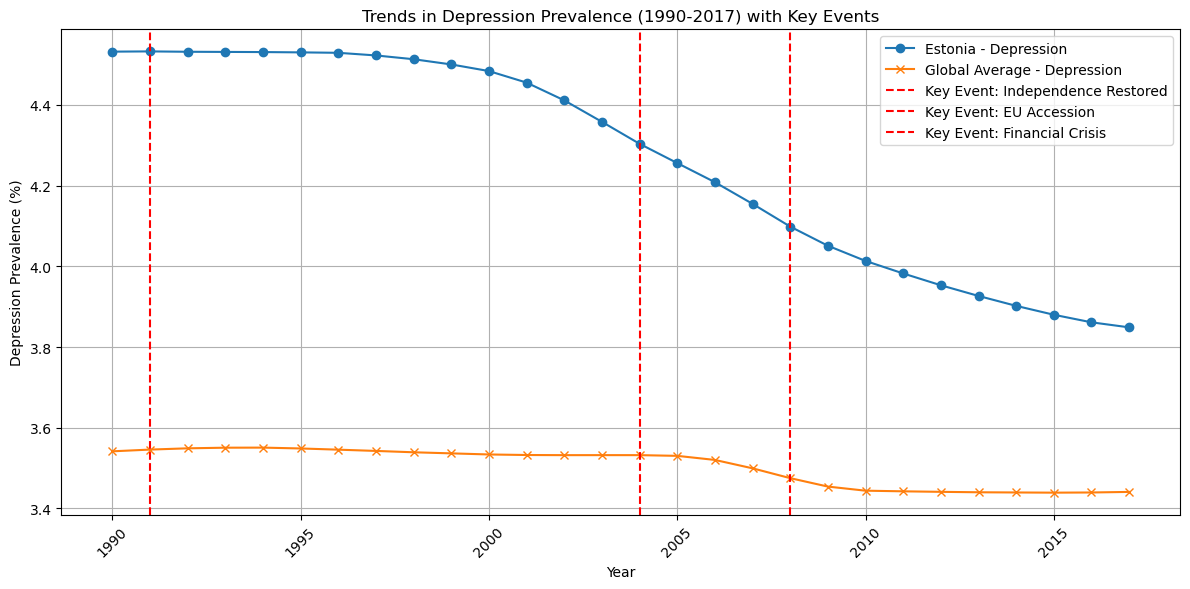

In [15]:
# Filter data for Estonia and Global averages for Depression
estonia_depression = mh_filtered[mh_filtered['Entity'] == 'Estonia'][['Year', 'Depression (%)']]
global_depression = mh_filtered[mh_filtered['Entity'] == 'World'].groupby('Year')['Depression (%)'].mean()

# Plotting Depression Trends with Key Events
plt.figure(figsize=(12, 6))
plt.plot(estonia_depression['Year'], estonia_depression['Depression (%)'], label='Estonia - Depression', marker='o')
plt.plot(global_depression.index, global_depression, label='Global Average - Depression', marker='x')

# Overlay key events
key_events = {
    '1991': 'Independence Restored',
    '2004': 'EU Accession',
    '2008': 'Financial Crisis',
}

for year, event in key_events.items():
    plt.axvline(x=int(year), color='r', linestyle='--', label=f'Key Event: {event}')

plt.title('Trends in Depression Prevalence (1990-2017) with Key Events')
plt.xlabel('Year')
plt.ylabel('Depression Prevalence (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows that after gaining independence, depression rates in Estonia started to decrease.

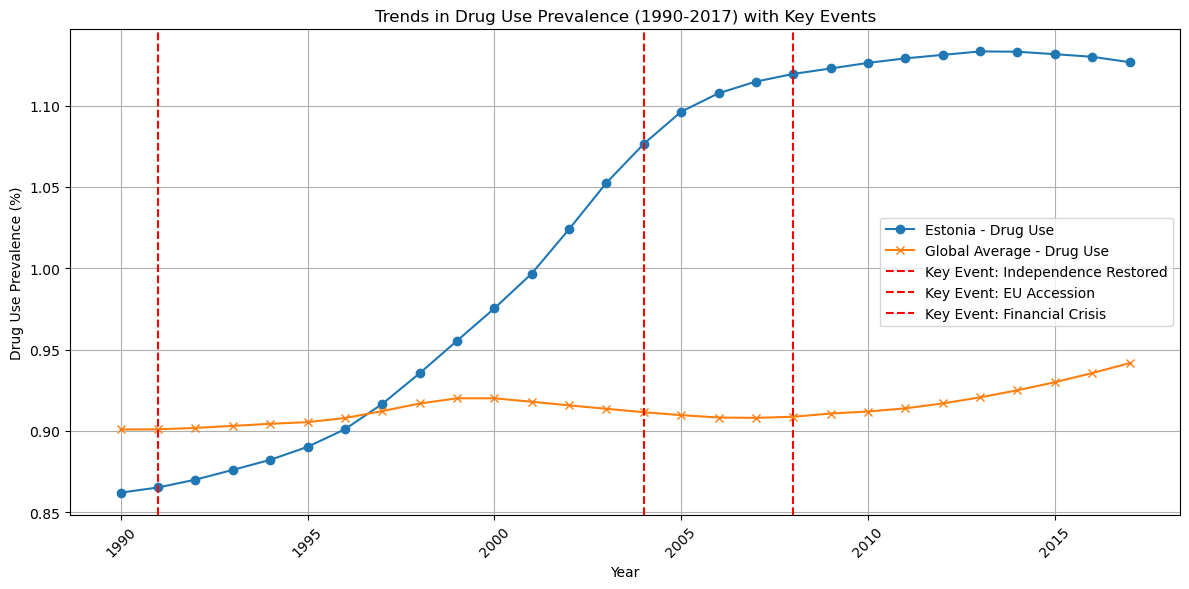

In [16]:
# Filter data for Estonia and Global averages for Drug Use
estonia_drug_use = mh_filtered[mh_filtered['Entity'] == 'Estonia'][['Year', 'Drug use disorders (%)']]
global_drug_use = mh_filtered[mh_filtered['Entity'] == 'World'].groupby('Year')['Drug use disorders (%)'].mean()

# Plotting Drug Use Trends with Key Events
plt.figure(figsize=(12, 6))
plt.plot(estonia_drug_use['Year'], estonia_drug_use['Drug use disorders (%)'], label='Estonia - Drug Use', marker='o')
plt.plot(global_drug_use.index, global_drug_use, label='Global Average - Drug Use', marker='x')

# Overlay key events
key_events = {
    '1991': 'Independence Restored',
    '2004': 'EU Accession',
    '2008': 'Financial Crisis',
}

for year, event in key_events.items():
    plt.axvline(x=int(year), color='r', linestyle='--', label=f'Key Event: {event}')

plt.title('Trends in Drug Use Prevalence (1990-2017) with Key Events')
plt.xlabel('Year')
plt.ylabel('Drug Use Prevalence (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows that gaining independence and newfound freedom might have contributed to the increase in drug use. To make sure of this trend, we would need data from before the 1990s to see the trends of drug use then. 

It's interesting to see that the financial crisis in 2008-2010 didn't significally affect the rates of depression and drug use. 

### Conclusion 

#### Findings Overview

The analysis of mental health trends in Estonia, particularly regarding depression and drug use, reveals a complex interplay of socio-economic and political factors over the past few decades. Following its independence in 1991, Estonia underwent significant transformations that improved overall living conditions and healthcare infrastructure. This progress contributed to a notable decline in depression rates as economic stability and better healthcare access took hold. Conversely, the increased exposure to Western lifestyles and the availability of new substances in the wake of independence coincided with a rise in drug use. These trends highlight the multifaceted nature of mental health, where socio-economic improvements can alleviate certain issues while potentially introducing new challenges. Understanding these dynamics provides valuable insights into how national transitions and global influences shape mental health patterns and underscores the importance of ongoing adaptation in public health strategies.


This dataset is very versatile and plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:
- Mental health disorders' rates among males and females
- The trends in Estonia versus another specific country
- Comparison between different regions etc. 
